<a href="https://colab.research.google.com/github/yym10618/Colab/blob/master/Ch03.%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%8B%A4%EC%8A%B5/3_%EB%94%A5%EB%9F%AC%EB%8B%9D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2022/05/10
이름 : 양용민
내용 : 딥러닝 CNN 모델 실습
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.8.0'

In [4]:
# 데이터 불러오기
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

In [5]:
# 데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


[6]


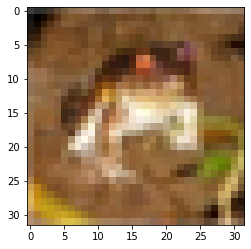

In [6]:
# 이미지 확인
plt.imshow(cifar_train_data[0])
print(cifar_train_label[0])

[16933 11937 46855 30657 40031 31747 44179 41520 44893]


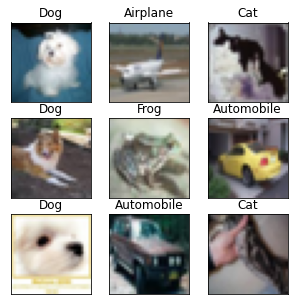

In [7]:
from numpy import random
# 데이터 샘플 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [8]:
# 모델학습을 위한 데이터 전처리(정규화)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

In [9]:
# 데이터 label 범주형(one-hot encoding)으로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

cifar_train_label[1]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [10]:
# 학습모델 구성
model = Sequential()

# CNN층
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2))

# FCNN층
model.add(Flatten())
model.add(Dense(256, activation='relu'))   # 은닉층
model.add(Dense(10, activation='softmax')) # 출력층

# 모델확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [11]:
# 학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [12]:
# 학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5208 - acc: 0.4406
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0558 - acc: 0.6241
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8696 - acc: 0.6953
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7669 - acc: 0.7281
Epoch 5/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6907 - acc: 0.7591
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6450 - acc: 0.7739
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5985 - acc: 0.7898
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5647 - acc: 0.8024
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.5320 - acc: 0.8111
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5028 - acc: 0.8231


In [13]:
# 테스트
result = model.evaluate(cifar_test_data, cifar_test_label)
result

313/313 [==============================] - 1s 4ms/step - loss: 0.6816 - acc: 0.7753


[0.6815826892852783, 0.7753000259399414]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


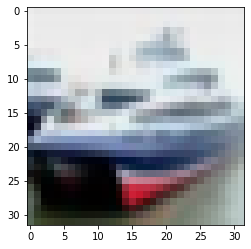

In [14]:
# 이미지 확인
plt.imshow(cifar_test_data[1])
print(cifar_test_label[1])

In [15]:
#학습모델 저장
model.save('/content/drive/MyDrive/파이썬 데이터 과학 실습/file/cifar_model.h5')